In [78]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Import StudentPerformance Dataset

In [3]:
df= pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Understand the Data Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Basic Summary Statistics

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Counting of Individual Categorical Columns

In [258]:
data_gender=df['gender'].value_counts()
print (data_gender)

gender
female    518
male      482
Name: count, dtype: int64


In [11]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [271]:
data_test_prep= df['test preparation course'].value_counts()
print(data_test_prep)

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [288]:
data_partent_edu=df['parental level of education'].value_counts()
print(data_partent_edu)

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [14]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

# Basic Statistical Analysis: Understanding Central Tendency and Measure of Dispersion

### Understanding Central Tendency of all Subjects:

In [86]:
mean_score_maths= df['math score'].mean()
print(f'Mean of Math Score is: {mean_score_maths: .2f}')

median_score_maths= df['math score'].median()
print(f'MEdian of Math Score is: {median_score_maths: .2f}')

mode_score_maths= df['math score'].mode()
print(f'Mode of Math Score is: {mode_score_maths}')

Mean of Math Score is:  66.09
MEdian of Math Score is:  66.00
Mode of Math Score is: 0    65
Name: math score, dtype: int64


In [88]:
mean_score_reading=df['reading score'].mean()
print(f'Mean of Reading Score is: {mean_score_reading: .2f}')

median_score_reading= df['reading score'].median()
print(f'MEdian of Reading Score is: {median_score_reading: .2f}')

mode_score_reading= df['reading score'].mode()
print(f'Mode of Reading Score is: {mode_score_reading}')

Mean of Reading Score is:  69.17
MEdian of Reading Score is:  70.00
Mode of Reading Score is: 0    72
Name: reading score, dtype: int64


In [90]:
mean_score_writing=df['writing score'].mean()
print(f'Mean of Writing Score is: {mean_score_writing: .2f}')

median_score_writing= df['writing score'].median()
print(f'MEdian of Writing Score is: {median_score_writing: .2f}')

mode_score_writing= df['writing score'].mode()
print(f'Mode of Writing Score is: {mode_score_writing}')

Mean of Writing Score is:  68.05
MEdian of Writing Score is:  69.00
Mode of Writing Score is: 0    74
Name: writing score, dtype: int64


### Indivial Subjects Mean on basis of Gender:

In [93]:
gender_basis_score= df.groupby('gender').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'})
df2=pd.DataFrame(gender_basis_score)
df2

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### Understanding Measure of Dispersion of all Subjects:

In [96]:
std_math= df['math score'].std()
print(f'Standard Deviation of Math Score is: {std_math: .2f}')

std_writing= df['writing score'].std()
print(f'Standard Deviation of Writing Score is: {std_writing: .2f}')

std_reading= df['reading score'].std()
print(f'Standard Deviation of Reading Score is: {std_reading: .2f}')

Standard Deviation of Math Score is:  15.16
Standard Deviation of Writing Score is:  15.20
Standard Deviation of Reading Score is:  14.60


### Understand Skewness and Kurtosis

In [99]:
skew_math= df['math score'].skew()
print(f'Skewness of Math Score is: {skew_math: .2f}')

skew_writing= df['writing score'].skew()
print(f'Skewness of Writing Score is: {skew_writing: .2f}')

skew_reading= df['reading score'].skew()
print(f'Skewness of Reading Score is: {skew_reading: .2f}')

Skewness of Math Score is: -0.28
Skewness of Writing Score is: -0.29
Skewness of Reading Score is: -0.26


In [101]:
kurtosis_math= df['math score'].kurt()
print(f'Kurtosis of Math Score is: {kurtosis_math: .2f}')

kurtosis_writing= df['writing score'].kurt()
print(f'Kurtosis of Writing Score is: {kurtosis_writing: .2f}')

kurtosis_reading= df['reading score'].kurt()
print(f'Kurtosis of Reading Score is: {kurtosis_reading: .2f}')

Kurtosis of Math Score is:  0.27
Kurtosis of Writing Score is: -0.03
Kurtosis of Reading Score is: -0.07


## Graphical Representation Histogram Plot to understanding Central Tendency and Measure of Dispersion

#### As we know that, 
    -Skewness of Math Score is: -0.28 
    -Mean of Math Score is:  66.09 
    -Standard Deviation of Math Score is:  15.16

    So, 68% of data lies between: 50.93 and 81.25
        95% of data lies between: 35.77 and 96.41

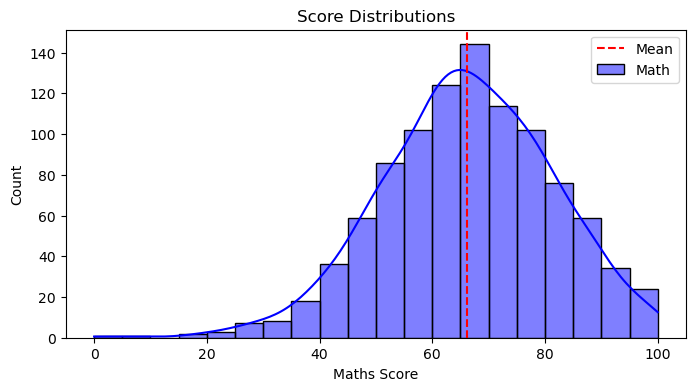

In [119]:
plt.figure(figsize=(8, 4))
sns.histplot(df['math score'], color='blue', label='Math', kde=True, bins=20)
plt.axvline(mean_score_maths, color='red', linestyle='--', label='Mean')
plt.title('Score Distributions')
plt.xlabel('Maths Score')
plt.ylabel('Count')
plt.legend()
plt.show()

#### As we know that, 
    -Skewness of Writing Score is: -0.29
    -Mean of Writing Score is:  68.05
    -Standard Deviation of Writing Score is:  15.20

    So, 68% of data lies between: 52.85 and 83.25
        95% of data lies between: 37.65 and 98.45

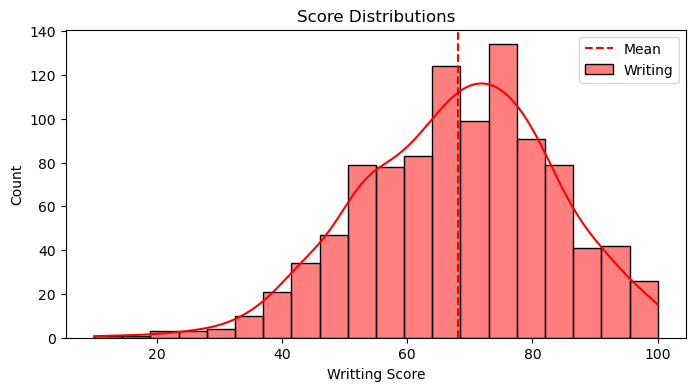

In [128]:
plt.figure(figsize=(8, 4))
sns.histplot(df['writing score'], color='red', label='Writing', kde=True, bins=20)
plt.axvline(mean_score_writing, color='red', linestyle='--', label='Mean')
plt.title('Score Distributions')
plt.xlabel('Writting Score')
plt.ylabel('Count')
plt.legend()
plt.show()

#### As we know that, 
    -Skewness of Reading Score is: -0.26
    -Mean of Reading Score is:  69.17
    -Standard Deviation of Reading Score is:  14.60

    So, 68% of data lies between: 54.67 and 83.77
        95% of data lies between: 39.97 and 98.37

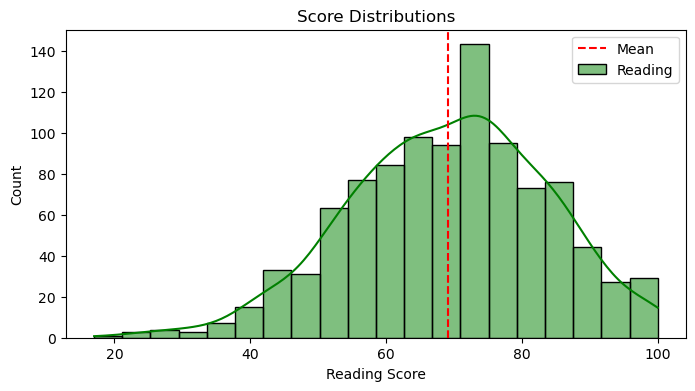

In [135]:
plt.figure(figsize=(8, 4))
sns.histplot(df['reading score'], color='green', label='Reading', kde=True, bins=20)
plt.axvline(mean_score_reading, color='red', linestyle='--', label='Mean')
plt.title('Score Distributions')
plt.xlabel('Reading Score')
plt.ylabel('Count')
plt.legend()
plt.show()


# Hypothesis Testing to Understand Significant Difference between Columns:

### Hypothesis Testing : ANOVA: 'parental level of education Vs math score'
    Answer: 
        Null Hypothersis: There is no significant difference between Parents education level and Students Maths Score.
        Alternate Hypothesis: There is significant difference between Parents education level and Students Maths Score. 

In [141]:
df.groupby('parental level of education')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


In [143]:
groups = [group['math score'].values for _, group in df.groupby('parental level of education')]

# Run ANOVA-test:
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat: .2f}, p-value: {p_value: .4f}")

alpha = 0.05
if p_value < alpha:
    print('There are significant different between Parents Education Level and Maths Score')
else:
    print('There are no significant different between Parents Education Level and Maths Score')

F-statistic:  6.52, p-value:  0.0000
There are significant different between Parents Education Level and Maths Score


In [145]:
# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['math score'], groups=df['parental level of education'], alpha=0.05)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master's degree    7.608 0.0084   1.2659 13.9501   True

####  Interpretation: 
        Students whose parents had just high school or some high school education tend to have significantly lower math scores compared to: Those with associate's, bachelor's, or master's degrees. Master’s degree and bachelor’s degree parents don’t significantly differ.

## Hypothesis Testing : Independent T-test: 'test preparation course Vs math score'

    Answer: 
        Null Hypothesis:There is no significant difference between Test Preperation Course and Students Maths Score.
        ALternate Hypothesis: There is significant difference between Test Preperation Course and Students Maths Score.

In [153]:
# Separate math scores based on test preparation course status
completed = df[df['test preparation course'] == 'completed']['math score']
none = df[df['test preparation course'] == 'none']['math score']

# Perform an independent t-test
t_stat1, p_value1 = ttest_ind(completed, none, equal_var=False)
print(f"T-statistic: {t_stat1: .2f}, p-value: {p_value1: .4f}")

alpha = 0.05
if p_value < alpha:
    print('There are significant different between Test preparation course and Maths Score')
else:
    print('There are no significant different between Test preparation course and Maths Score')

T-statistic:  5.79, p-value:  0.0000
There are significant different between Test preparation course and Maths Score


## Making Total Score Column (taking Only Reading and Writing) for more Hypothesis testing:

In [159]:
df1=pd.read_csv('StudentsPerformance.csv')
df1['total_score_read_write'] = df1['reading score'] + df1['writing score']
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score_read_write
0,female,group B,bachelor's degree,standard,none,72,72,74,146
1,female,group C,some college,standard,completed,69,90,88,178
2,female,group B,master's degree,standard,none,90,95,93,188
3,male,group A,associate's degree,free/reduced,none,47,57,44,101
4,male,group C,some college,standard,none,76,78,75,153


### Indepedent T-test between Test Prep Course and Total Score:

    Answer:
        Null Hypothesis:There is no significant difference between Test Preperation Course and Students Total Score.
        ALternate Hypothesis: There is significant difference between Test Preperation Course and Students Total Score.

In [166]:
completed = df1[df1['test preparation course'] == 'completed']['total_score_read_write']
none = df1[df1['test preparation course'] == 'none']['total_score_read_write']

t_stat2, p_value2 = ttest_ind(completed, none, equal_var=False)
print(f"T-statistic: {t_stat2: .2f}, p-value: {p_value2: .4f}")

alpha = 0.05
if p_value < alpha:
    print('There are significant different between Test preparation course and Total Score')
else:
    print('There are no significant different between Test preparation course and Total Score')

T-statistic:  9.50, p-value:  0.0000
There are significant different between Test preparation course and Total Score


### ANOVA test Between Total Score and Parents Education Level

    Answer: 
        Null Hypothersis: There is no significant difference between Parents education level and Students Total Score.
        Alternate Hypothesis: There is significant difference between Parents education level and Students Total Score. 

In [170]:
groups = [group['total_score_read_write'].values for name, group in df1.groupby('parental level of education')]

# Run ANOVA
f_stat3, p_value3 = f_oneway(*groups)
print(f"F-statistic: {f_stat3: .2f}, p-value: {p_value3: .4f}")

alpha = 0.05
if p_value < alpha:
    print('There are significant different between Parents Education Level and Total Score')
else:
    print('There are no significant different between Parents Education Level and Total Score')

F-statistic:  12.02, p-value:  0.0000
There are significant different between Parents Education Level and Total Score


In [172]:
tukey = pairwise_tukeyhsd(endog=df1['total_score_read_write'], groups=df1['parental level of education'], alpha=0.05)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree    5.557 0.5314  -3.7709  14.885  False
associate's degree       high school -13.6713    0.0 -21.6963 -5.6462   True
associate's degree   master's degree  10.2265 0.1453  -1.7662 22.2192  False
associate's degree      some college  -2.5234 0.9384 -10.2605  5.2136  False
associate's degree  some high school  -8.9975 0.0226 -17.2225 -0.7725   True
 bachelor's degree       high school -19.2283    0.0 -28.7686  -9.688   True
 bachelor's degree   master's degree   4.6695 0.9109  -8.3858 17.7247  False
 bachelor's degree      some college  -8.0805 0.1307 -17.3798  1.2188  False
 bachelor's degree  some high school -14.5545 0.0003 -24.2636 -4.8455   True
       high school   master's degree  23.8978    0.0  11.7392 36.0563   True

#### Interpretation Summary: 
    - Students whose parents have only a high school or some high school education tend to have significantly lower total scores.
    - Master’s degree and bachelor’s degree are associated with much higher student performance.
    - Differences between mid-range education levels (like associate’s vs some college) are not always significant.

### Calcualte Z-Score where X = 90 in maths score. We have to findout 90+ 'Excellent' probability

In [182]:
z_score= (90-mean_score_maths)/df['math score'].std()
print(f'Z-Score of 90 is: {z_score: .2f}')
probability= 1- stats.norm.cdf(z_score)
print(f'Probability of scoring above 90 in Maths: {probability: .2f}')

Z-Score of 90 is:  1.58
Probability of scoring above 90 in Maths:  0.06


## BOX Plot: Gender wise per Subject:

/var/folders/_b/vg48s07903s_dydp1hdd5qy40000gn/T/ipykernel_44347/2883795402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='math score', palette='pastel')
/var/folders/_b/vg48s07903s_dydp1hdd5qy40000gn/T/ipykernel_44347/2883795402.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='reading score', palette='pastel')
/var/folders/_b/vg48s07903s_dydp1hdd5qy40000gn/T/ipykernel_44347/2883795402.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='writing score', palette=

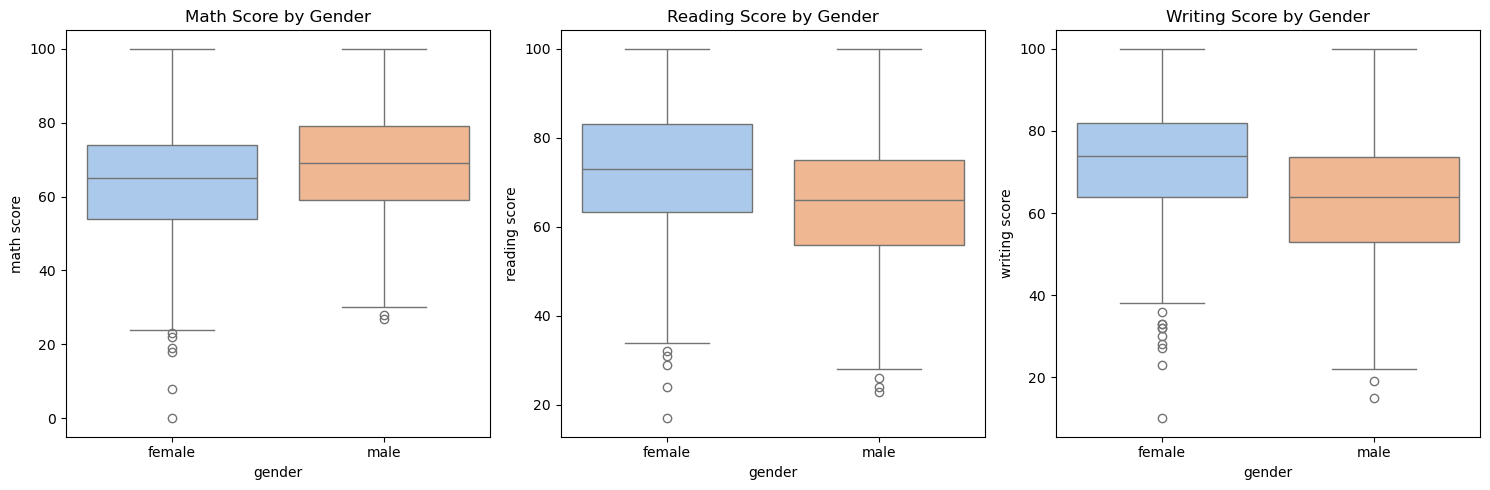

In [191]:
plt.figure(figsize=(15, 5))

# Math score
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='gender', y='math score', palette='pastel')
plt.title('Math Score by Gender')

# Reading score
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='gender', y='reading score', palette='pastel')
plt.title('Reading Score by Gender')

# Writing score
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='gender', y='writing score', palette='pastel')
plt.title('Writing Score by Gender')

plt.tight_layout()
plt.show()

#### Interpretation: IQR= 50%
        Female: 
                For maths: Most female Score b/w : 55 to 75
                For reading: Most female Score b/w : 62 to 82
                For writing: Most female Score b/w : 62 to 82
        Male: 
                For maths: Most female Score b/w : 65 to 82
                For reading: Most female Score b/w : 55 to 75
                For writing: Most female Score b/w : 55 to 75

# Finding Correlation between Columns: Understanding Strength and Direction

In [220]:
df2=pd.read_csv('StudentsPerformance.csv')
df2['Total Score']= df1['math score'] + df1['reading score'] + df1['writing score']

def classify_performance(score):
    if score < 100:
        return 'Poor'
    elif 100 <= score <= 149:
        return 'Fair'
    elif  150<= score <= 249:
        return 'Good'
    else:
        return 'Excelent'
df2['performance_level'] = df2['Total Score'].apply(classify_performance)
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Good
1,female,group C,some college,standard,completed,69,90,88,247,Good
2,female,group B,master's degree,standard,none,90,95,93,278,Excelent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fair
4,male,group C,some college,standard,none,76,78,75,229,Good


### Encoding Categorical Columns to Numerical Columns

In [223]:
gender_map= {'female':0, 'male': 1}
race_map= {'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}
lunch_map={'standard':0,'free/reduced':1}
test_prep_map={'none':0, 'completed':1}
parents_education_map= {'some high school':0,'high school':1,'some college':2,"associate's degree":3,"bachelor's degree":4,"master's degree":5}

In [225]:
df2['gender_encoded']=df2['gender'].map(gender_map)
df2['race_encoded']=df2['race/ethnicity'].map(race_map)
df2['parents_education_encode']=df2['parental level of education'].map(parents_education_map)
df2['test_prep_encode']=df2['test preparation course'].map(test_prep_map)
df2['lunch_encode']=df2['lunch'].map(lunch_map)

In [227]:
df2=df2.drop(columns=['gender','race/ethnicity','parental level of education','test preparation course','lunch'])
df2.head()

,math score,reading score,writing score,Total Score,performance_level,gender_encoded,race_encoded,parents_education_encode,test_prep_encode,lunch_encode
0,72,72,74,218,Good,0,1,4,0,0
1,69,90,88,247,Good,0,2,2,1,0
2,90,95,93,278,Excelent,0,1,5,0,0
3,47,57,44,148,Fair,1,0,3,0,1
4,76,78,75,229,Good,1,2,2,0,0


### Creating Correlation Matrix table

In [230]:
correlation=df1.corr(numeric_only=True)
correlation

,math score,reading score,writing score,total_score_read_write,Total Score,gender_encoded,race_encoded,parents_education_encode,test_prep_encode,lunch_encode
math score,1.000000,0.817580,0.802642,0.819311,0.918746,0.167982,0.216415,0.159432,0.177702,-0.350877
reading score,0.817580,1.000000,0.954598,0.988121,0.970331,-0.244313,0.145253,0.190908,0.241780,-0.229560
writing score,0.802642,0.954598,1.000000,0.989039,0.965667,-0.301225,0.165691,0.236715,0.312946,-0.245769
total_score_read_write,0.819311,0.988121,0.989039,1.000000,0.979125,-0.276493,0.157473,0.216743,0.281284,-0.240572
Total Score,0.918746,0.970331,0.965667,0.979125,1.000000,-0.130861,0.185168,0.205785,0.256710,-0.290064
gender_encoded,0.167982,-0.244313,-0.301225,-0.276493,-0.130861,1.000000,-0.001502,-0.043934,0.006028,-0.021372
race_encoded,0.216415,0.145253,0.165691,0.157473,0.185168,-0.001502,1.000000,0.095906,0.017508,-0.046563
parents_education_encode,0.159432,0.190908,0.236715,0.216743,0.205785,-0.043934,0.095906,1.000000,-0.007143,0.023259
test_prep_encode,0.177702,0.241780,0.312946,0.281284,0.256710,0.006028,0.017508,-0.007143,1.000000,0.017044
lunch_encode,-0.350877,-0.229560,-0.245769,-0.240572,-0.290064,-0.021372,-0.046563,0.023259,0.017044,1.000000


### Ploting HeatMap For better Understanding of correlation between each columns

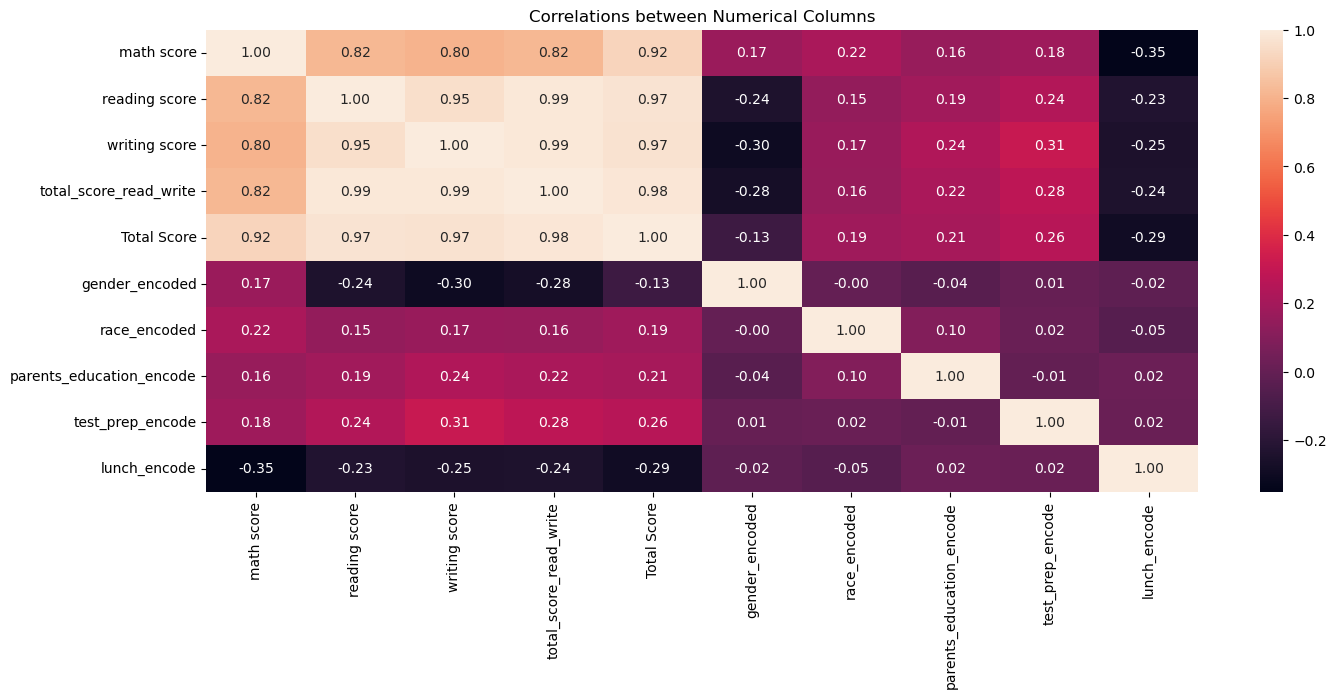

In [233]:
plt.figure(figsize=(16,6))
sns.heatmap(correlation,annot=True, fmt=".2f")
plt.title('Correlations between Numerical Columns')
plt.show()

### Creating Pairplot for Better Understanding

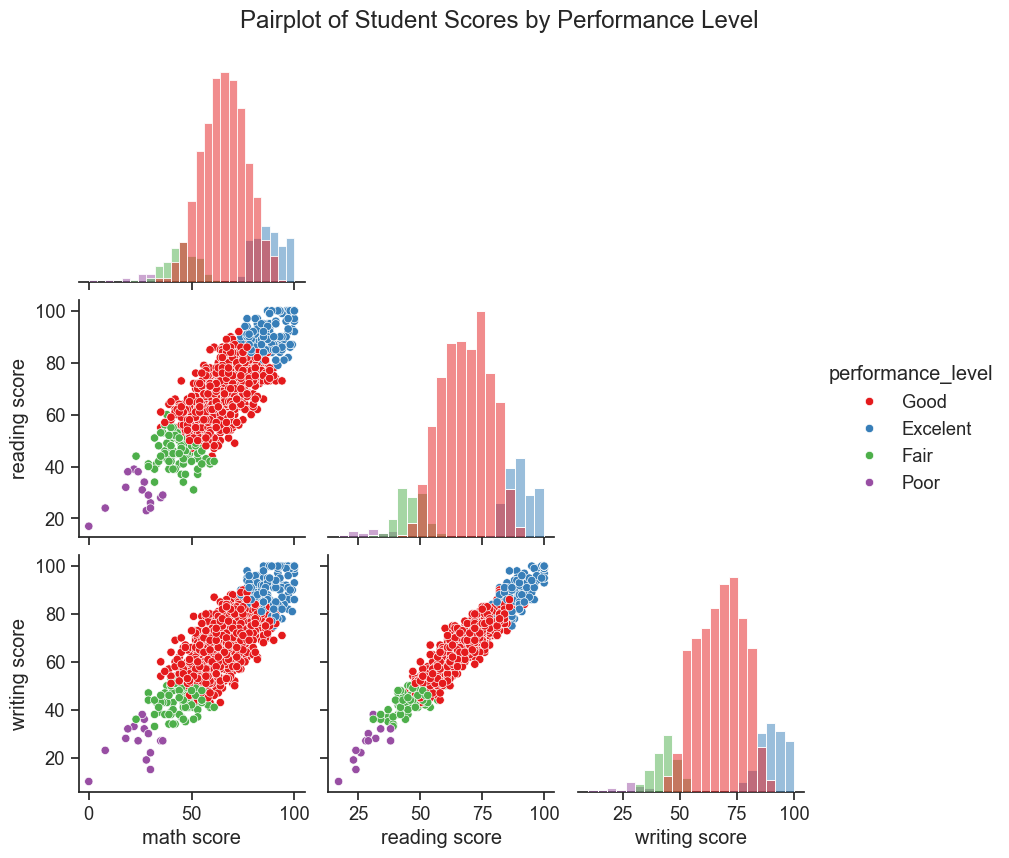

In [244]:
sns.set(style="ticks", font_scale=1.2)
pairplot = sns.pairplot(df2, vars=["math score", "reading score", "writing score"], hue="performance_level", palette="Set1", diag_kind="hist", corner=True, height=2.8)
pairplot.fig.suptitle("Pairplot of Student Scores by Performance Level", y=1.02)
plt.show()

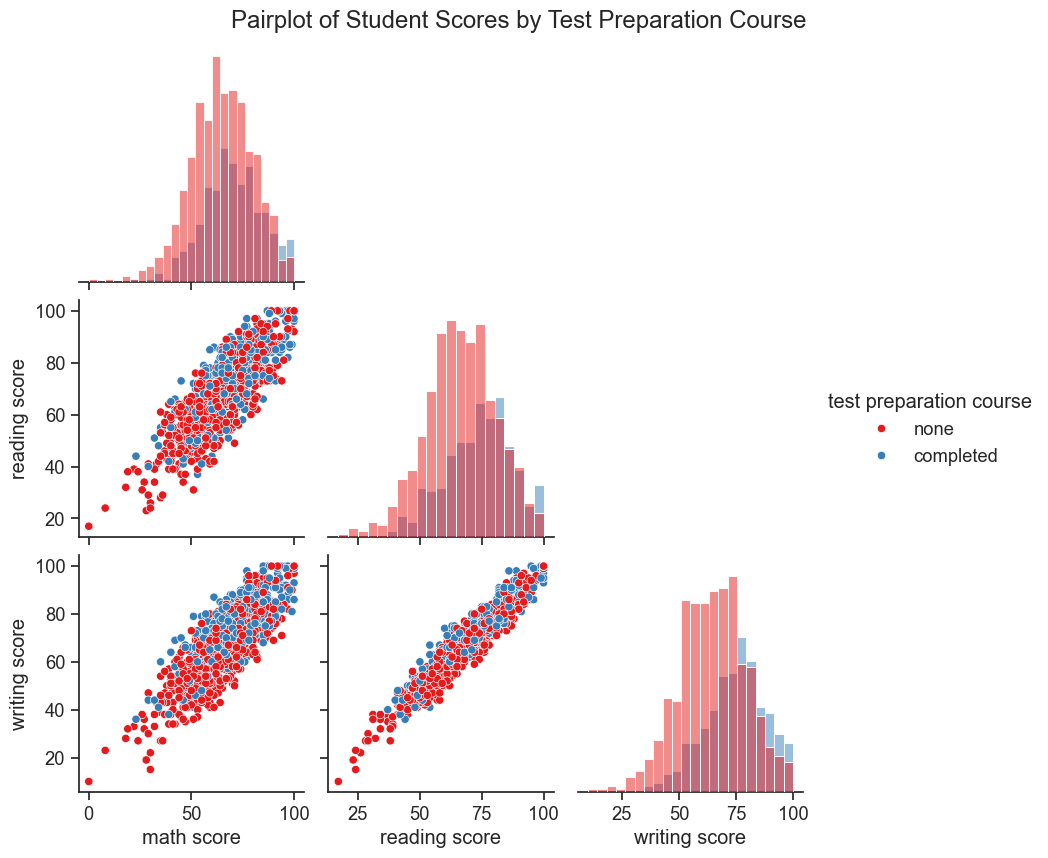

In [248]:
sns.set(style="ticks", font_scale=1.2)
pairplot = sns.pairplot(df, vars=["math score", "reading score", "writing score"], hue="test preparation course", palette="Set1", diag_kind="hist", corner=True, height=2.8)
pairplot.fig.suptitle("Pairplot of Student Scores by Test Preparation Course", y=1.02)
plt.show()

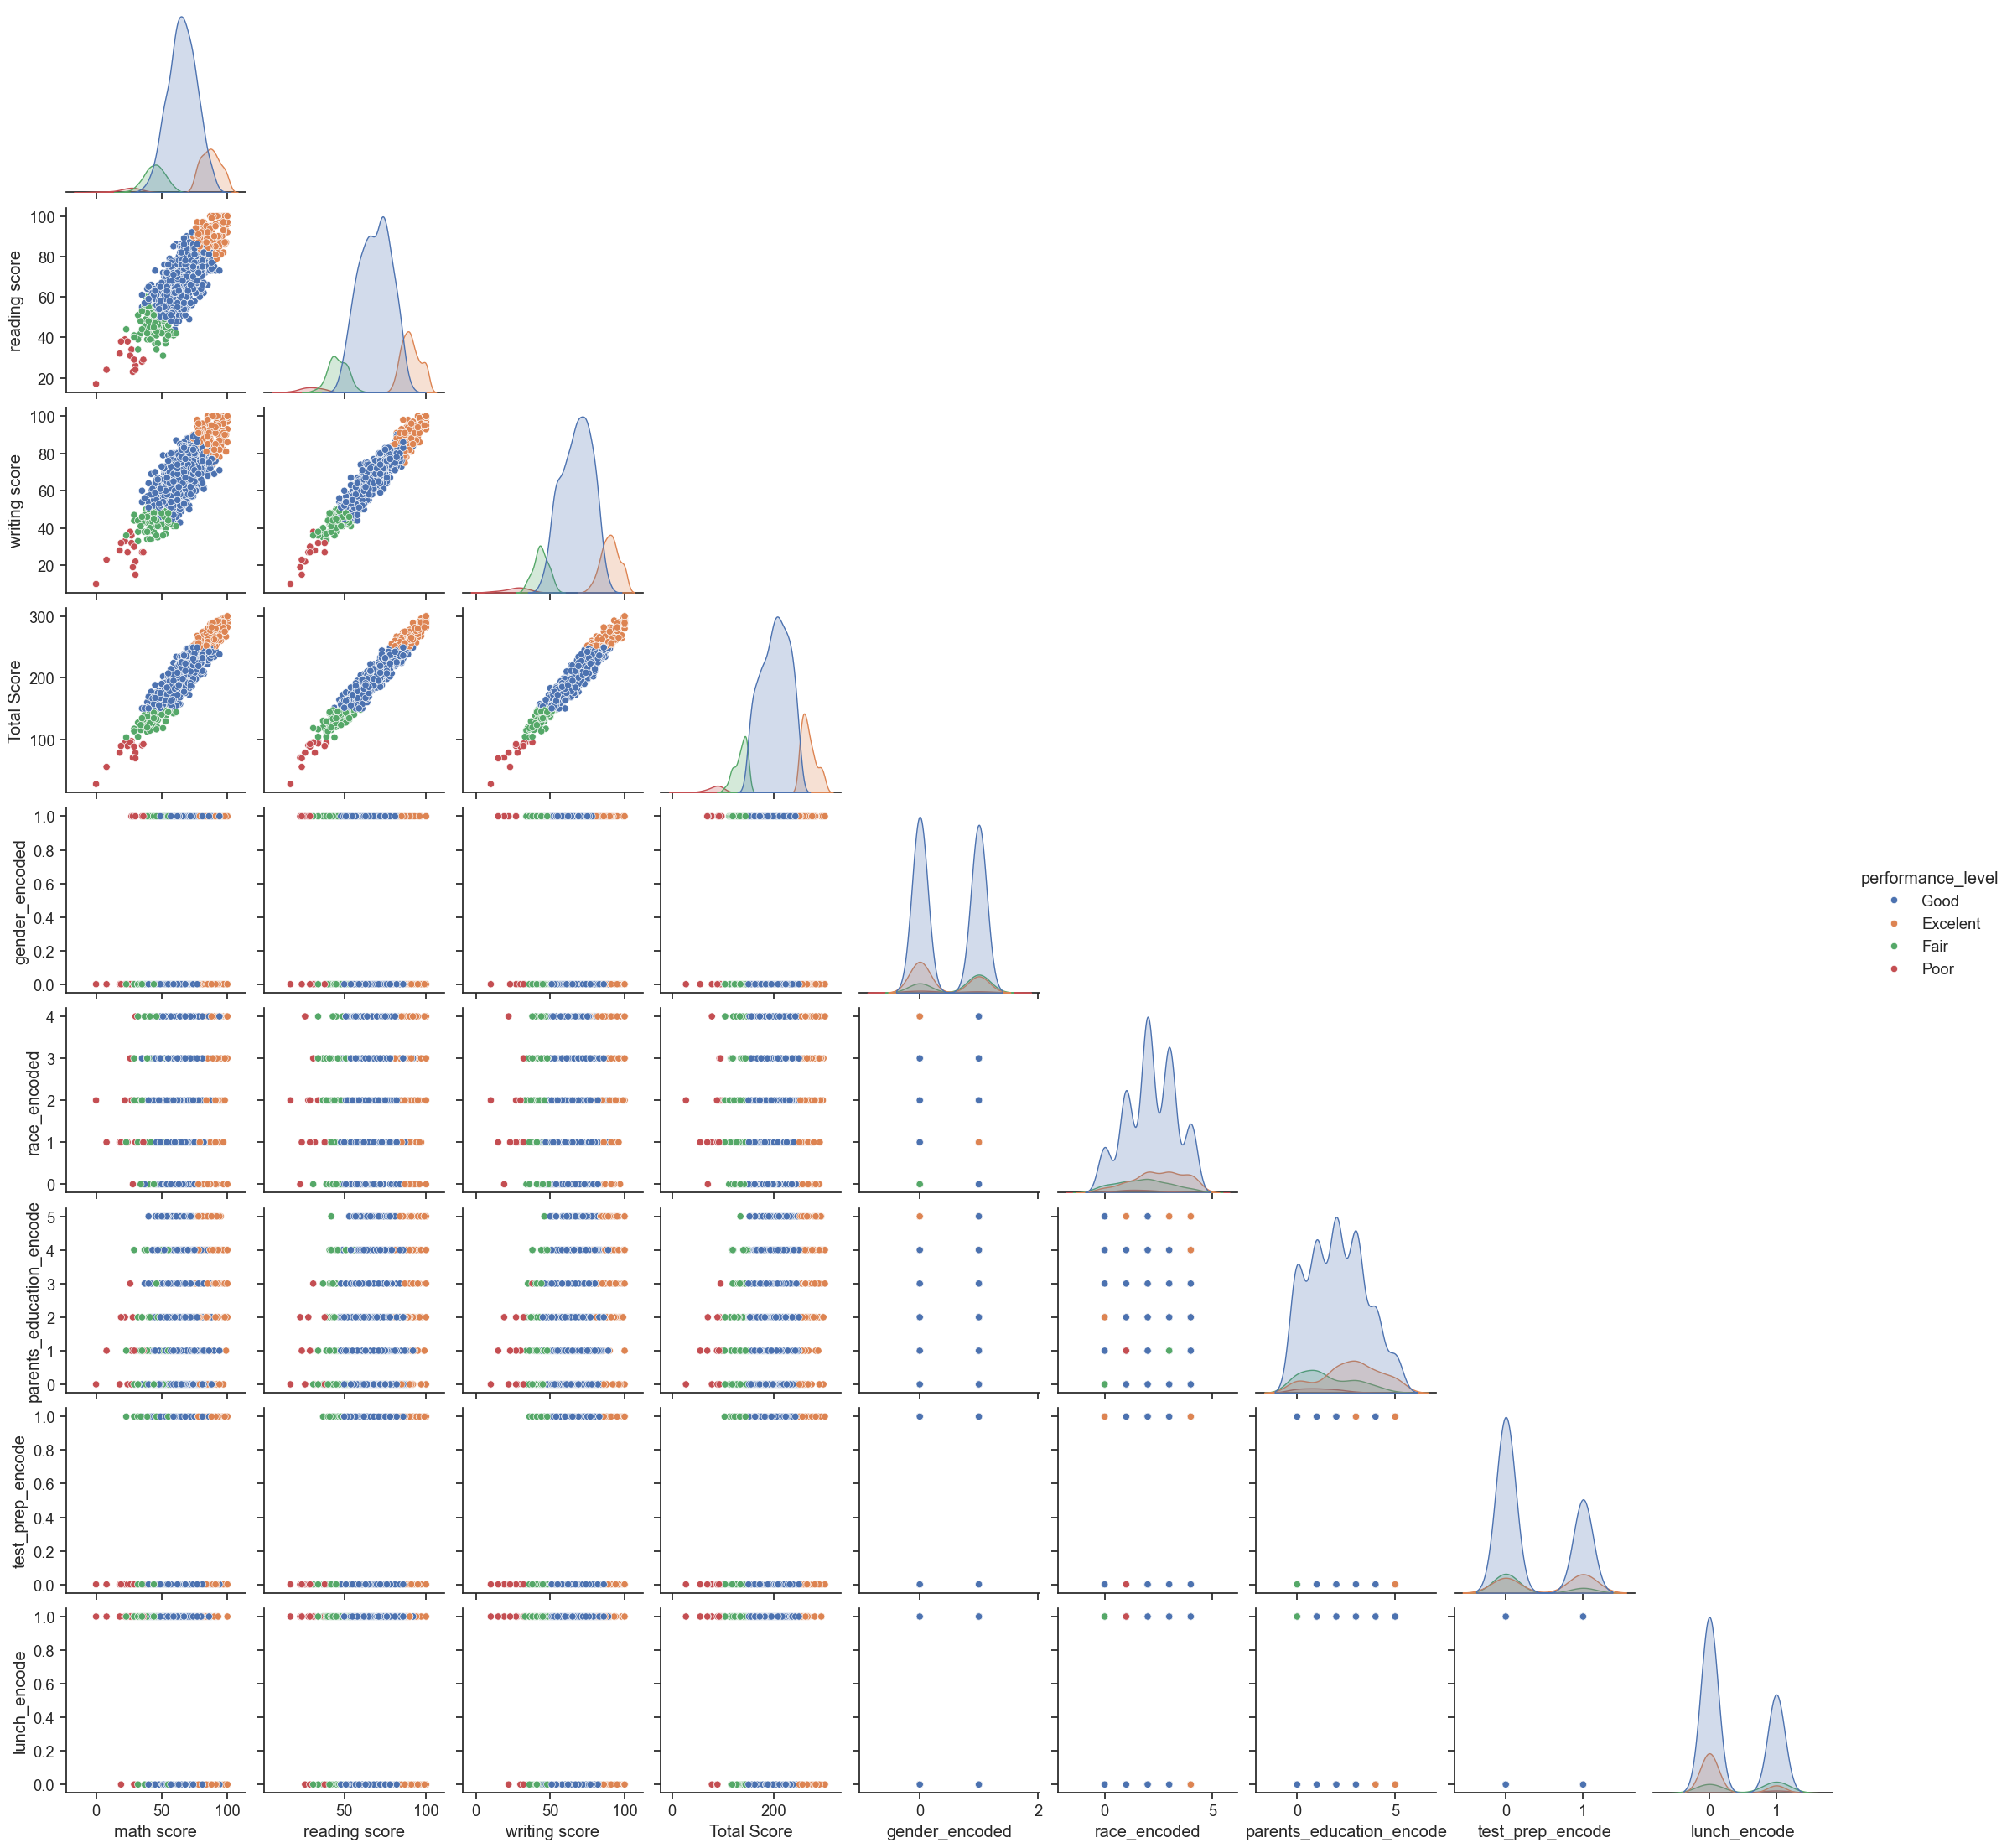

In [252]:
sns.set(style="ticks", font_scale=1.2)
sns.pairplot(df2, diag_kind='kde', corner=True, hue='performance_level')
plt.show()

# PieChart Analysis

### Gender Distribution

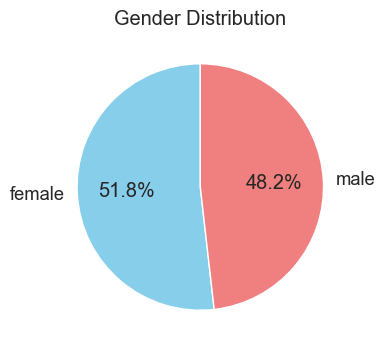

In [282]:
plt.figure(figsize=(4, 4))
plt.pie(
    data_gender,
    labels=data_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Gender Distribution")
plt.show()

### Test Preparation Course among Students

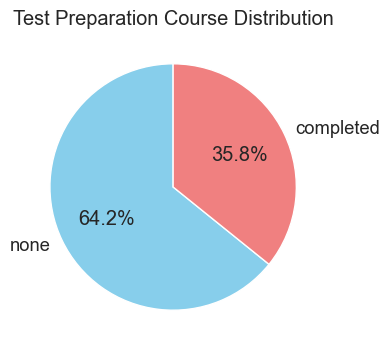

In [290]:
plt.figure(figsize=(4, 4))
plt.pie(
    data_test_prep,
    labels=data_test_prep.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Test Preparation Course Distribution")
plt.show()

### Parents Education Level Analysis:

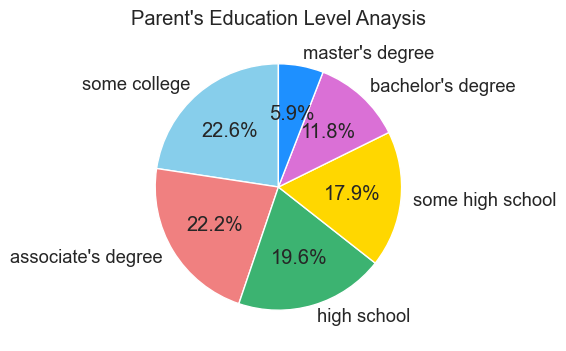

In [315]:
plt.figure(figsize=(4, 4))
plt.pie(
    data_partent_edu,
    labels=data_partent_edu.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral', 'mediumseagreen', 'gold', 'orchid','dodgerblue']
)
plt.title("Parent's Education Level Anaysis")
plt.show()

# Overall Understand and Insights From the Dataset:

## After conducting the statistical analysis :

### Key Observations:
    1. Males scored higher in math, while females tended to perform better in reading and writing. It means Male candidates have strength in logical understanding whereas Females are good at language skills.
    
    2. Students whose parents had higher education levels (bachelor’s, master’s) tended to score better across all subjects. And those whose parents had only high school or some high school had noticeably lower mean scores. So we can say that 'Parental education strongly influences academic performance due to better support, exposure.'
    
    3. Students who completed the 'Test Preparation Course' had significantly higher average scores in all three subjects.

### Insights: 
    1. School authority should take necessary steps like: Taking Extra classes and Make councelling meeting for those students with lower Parental Education. Because it has been seen that Students with low parental background face it challenging to score better marks in exams.
    
    2. School authority should make strict rules for mandatorily taking active participation in Test Preparation Course as it has been seen that those take part in exams scored better in exams. 
    
    3. As there are significant difference between Gender wise subject scores, like : males are scored in maths. For this matter school authority should should introduce some policies and teaching methods can close the gap, promoting equal confidence and success across all subjects.